In [66]:
import os
from PIL import Image
import xml.dom.minidom
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [21]:
ImgPath = './earImageDataset' 
AnnoPath = './anotations'

In [22]:
imagelist = os.listdir(ImgPath)

In [44]:
rand_img = random.sample(imagelist, 1)
print(rand_img)

['053_t.jpg']


In [45]:
image_pre, ext = os.path.splitext(rand_img[0])
print(image_pre, ext)

053_t .jpg


In [94]:
img = cv2.imread(ImgPath+'/'+rand_img[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ano = xml.dom.minidom.parse(AnnoPath + '/' + image_pre + '.xml')
annotation = ano.documentElement

In [95]:
img.shape


(4032, 3024, 3)

In [96]:
annotation

<DOM Element: annotation at 0x7f449f9b7768>

In [97]:
ymin = int(annotation.getElementsByTagName('xmin')[0].childNodes[0].data)
xmin = int(annotation.getElementsByTagName('ymin')[0].childNodes[0].data)
ymax = int(annotation.getElementsByTagName('xmax')[0].childNodes[0].data)
xmax = int(annotation.getElementsByTagName('ymax')[0].childNodes[0].data)

In [98]:
xmin

751

In [99]:
rec_img = cv2.rectangle(img.copy(),(xmin,ymin),(xmax,ymax),(255,0,0),20)

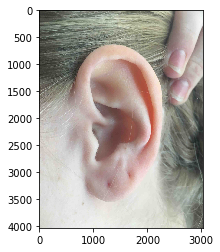

In [100]:
plt.imshow(img)

In [101]:
img_shape = img.shape

In [104]:
resize_img = cv2.resize(img,(img_shape[1]//4,img_shape[0]//4))

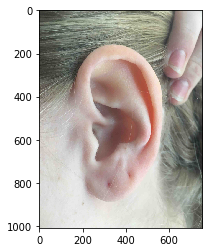

In [105]:
plt.imshow(resize_img)

In [108]:
re_xmin = xmin//4
re_ymin = ymin//4
re_xmax = xmax//4
re_ymax = ymax//4

In [109]:
rec_resized_img = cv2.rectangle(resize_img.copy(),(re_xmin,re_ymin),(re_xmax,re_ymax),(255,0,0),20)

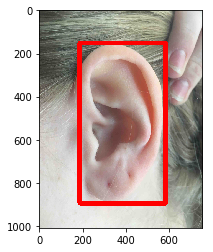

In [110]:
plt.imshow(rec_resized_img)

In [111]:
annotation.getElementsByTagName('xmin')[0].childNodes[0].data = str(int(annotation.getElementsByTagName('xmin')[0].childNodes[0].data)//4)
annotation.getElementsByTagName('ymin')[0].childNodes[0].data = str(int(annotation.getElementsByTagName('ymin')[0].childNodes[0].data)//4)
annotation.getElementsByTagName('xmax')[0].childNodes[0].data = str(int(annotation.getElementsByTagName('xmax')[0].childNodes[0].data)//4)
annotation.getElementsByTagName('ymax')[0].childNodes[0].data = str(int(annotation.getElementsByTagName('ymax')[0].childNodes[0].data)//4)

In [116]:
with open('./try.xml','w') as fh:
    ano.writexml(fh)

In [164]:

for img_name in imagelist:
    image_pre, ext = os.path.splitext(img_name)
    if ext == '.xml':
        continue
    print(img_name)
    img1 = cv2.imread(ImgPath+'/'+img_name)
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img_shape = img.shape
    ano = xml.dom.minidom.parse(AnnoPath + '/' + image_pre + '.xml')
    annotation = ano.documentElement
    a = (int(int(annotation.getElementsByTagName('xmin')[0].childNodes[0].data)))
    b = (int(int(annotation.getElementsByTagName('ymin')[0].childNodes[0].data)))
    c = (int(int(annotation.getElementsByTagName('xmax')[0].childNodes[0].data)))
    d = (int(int(annotation.getElementsByTagName('ymax')[0].childNodes[0].data)))
    
    annotation.getElementsByTagName('xmin')[0].childNodes[0].data = str(int((img_shape[1]-d)/4.44))
    annotation.getElementsByTagName('ymin')[0].childNodes[0].data = str(int(a/4.2))
    annotation.getElementsByTagName('xmax')[0].childNodes[0].data = str(int((img_shape[1]-b)/4.44))
    annotation.getElementsByTagName('ymax')[0].childNodes[0].data = str(int(c/4.2))
    xmin = int(annotation.getElementsByTagName('xmin')[0].childNodes[0].data)
    ymin = int(annotation.getElementsByTagName('ymin')[0].childNodes[0].data)
    xmax = int(annotation.getElementsByTagName('xmax')[0].childNodes[0].data)
    ymax = int(annotation.getElementsByTagName('ymax')[0].childNodes[0].data)
    
    resize_img = cv2.resize(img,(int(img_shape[1]/4.44),int(img_shape[0]/4.2)))
    plt.imsave('./re_image/'+img_name,resize_img)
    with open('./re_ano/'+image_pre + '.xml','w') as fh:
        ano.writexml(fh)
    re_rec = cv2.rectangle(resize_img.copy(),(xmin,ymin),(xmax,ymax),(255,0,0),5)
    plt.imsave('./re_rec/'+img_name,re_rec)
    

195_t.jpg
180_t.jpg
181_.jpg
181_d.jpg
181_dt.jpg
181_t.jpg
182_.jpg
182_d.jpg
182_dt.jpg
182_t.jpg
183_.jpg
183_d.jpg
183_dt.jpg
183_t.jpg
184_.jpg
184_d.jpg
184_dt.jpg
184_t.jpg
185_.jpg
185_d.jpg
185_dt.jpg
185_t.jpg
186_.jpg
186_d.jpg
186_dt.jpg
186_t.jpg
187_.jpg
187_d.jpg
187_dt.jpg
187_t.jpg
188_.jpg
188_d.jpg
188_dt.jpg
188_t.jpg
189_.jpg
189_d.jpg
189_dt.jpg
189_t.jpg
190_.jpg
190_d.jpg
190_dt.jpg
190_t.jpg
191_.jpg
191_d.jpg
191_dt.jpg
191_t.jpg
192_.jpg
192_d.jpg
192_dt.jpg
192_t.jpg
193_.jpg
193_d.jpg
193_dt.jpg
193_t.jpg
194_.jpg
194_d.jpg
194_dt.jpg
194_t.jpg
195_.jpg
195_d.jpg
195_dt.jpg
165_t.jpg
166_.jpg
166_d.jpg
166_dt.jpg
166_t.jpg
167_.jpg
167_d.jpg
167_dt.jpg
167_t.jpg
168_.jpg
168_d.jpg
168_dt.jpg
168_t.jpg
169_.jpg
169_d.jpg
169_dt.jpg
169_t.jpg
170_.jpg
170_d.jpg
170_dt.jpg
170_t.jpg
171_.jpg
171_d.jpg
171_dt.jpg
171_t.jpg
172_.jpg
172_d.jpg
172_dt.jpg
172_t.jpg
173_.jpg
173_d.jpg
173_dt.jpg
173_t.jpg
174_.jpg
174_d.jpg
174_dt.jpg
174_t.jpg
175_.jpg
175_d.jpg
1